In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Exercise 1
# part a

\begin{align}
    D_{[4,0]}^2  u(x_i)&=
    c_{-4} u(x_i-4h) + 
    c_{-3} u(x_i-3h) + 
    c_{-2} u(x_i-2h) +
    c_{-1} u(x_i-h) + 
    c_{0} u(x_i)
\end{align}

In [3]:
# Define the variables
c0, c1, c2, c3, c4, h = sp.symbols('c0 c1 c2 c3 c4 h')

# Define the system of equations
eq1 = sp.Eq(c0 + c1 +      c2 +      c3 +      c4, 0)
eq2 = sp.Eq(     c1 + 2*   c2 + 3*   c3 + 4*   c4, 0)
eq3 = sp.Eq(     c1 + 2**2*c2 + 3**2*c3 + 4**2*c4, 2/sp.Pow(h, 2))
eq4 = sp.Eq(     c1 + 2**3*c2 + 3**3*c3 + 4**3*c4, 0)
eq5 = sp.Eq(     c1 + 2**4*c2 + 3**4*c3 + 4**4*c4, 0)

# Solve the system
print('solution is')
solution = sp.solve((eq1, eq2, eq3, eq4, eq5), (c0, c1, c2, c3, c4))
print(solution)

solution is
{c0: 35/(12*h**2), c1: -26/(3*h**2), c2: 19/(2*h**2), c3: -14/(3*h**2), c4: 11/(12*h**2)}


## part b

\begin{align}
    D_{[2,2]}^2  u(x_i)&= 
    a_{2} u(x_i-2h) +
    a_{1} u(x_i-h) + 
    c_{0} u(x_i) +
    c_{1} u(x_i+h) + 
    c_{2} u(x_i+2h)
\end{align}

In [4]:
# Define the variables
a2, a1, c0, c1, c2, h = sp.symbols('a2 a1 c0 c1 c2 h')

# Define the system of equations
eq1 = sp.Eq(      a2 + a1 + c0 + c1 +      c2, 0)
eq2 = sp.Eq(   -2*a2 - a1 +      c1 +    2*c2, 0)
eq3 = sp.Eq( 2**2*a2 + a1 +      c1 + 2**2*c2, 2/sp.Pow(h, 2))
eq4 = sp.Eq(-2**3*a2 - a1 +      c1 + 2**3*c2, 0)
eq5 = sp.Eq( 2**4*a2 + a1 +      c1 + 2**4*c2, 0)

# Solve the system
print('solution is')
solution = sp.solve((eq1, eq2, eq3, eq4, eq5), (a2, a1, c0, c1, c2))
print(solution)

solution is
{a1: 4/(3*h**2), a2: -1/(12*h**2), c0: -5/(2*h**2), c1: 4/(3*h**2), c2: -1/(12*h**2)}


## part c

In [5]:
def D_2(left, right, h, eval_point=0, 
        u=lambda x: np.exp(np.cos(x)), 
        u_xx=lambda x: (np.sin(x)**2 - np.cos(x)) * np.exp(np.cos(x))):
    """
    Approximates the second derivative of a function u(x) at a given point 
    using a finite difference stencil.

    The function constructs a system of equations to determine the finite 
    difference coefficients for the second derivative and then applies 
    these coefficients to approximate u''(x).

    Parameters:
    -----------
    left : int
        Number of stencil points to the left of the evaluation point.
    right : int
        Number of stencil points to the right of the evaluation point.
    h : float
        Step size for the finite difference approximation.
    eval_point : float, optional
        The x-coordinate for approximated second derivative
        Default: 0.
    u : function, optional
        The function u(x) whose second derivative is approximated. 
        Default: u(x) = exp(cos(x)).
    u_xx : function, optional
        The exact second derivative u''(x) for error computation.
        Default: u(x) = exp(cos(x)).

    Returns:
    --------
    u_xx_hat : float
        Approximation of u''(x) at eval_point.
    error : float
        Absolute error for the approximation.
    """

    if left + right < 2:
        raise ValueError('left + right should be at least 2')
    
    N = left + right + 1  # Number of stencil points
    stencils = np.arange(-left, right + 1)  # Stencil range

    # ____ Construct the system matrix A ____
    A = np.zeros([N, N])  # initialize matrix
    for i in range(N):
        for j, m in enumerate(stencils):
            A[i, j] = m ** i # set values

    # ____ Construct right-hand side b ____
    b = np.zeros(N) # initial ize with zeros
    b[2] = 2 / h**2  # setting the non-zero element

    # Solve for finite difference coefficients
    c = np.linalg.solve(A, b)

    # ___ Evaluate function at stencil points ____
    x_vals = np.array([eval_point + m * h for m in stencils])
    u_vals = np.array([u(xi) for xi in x_vals])  # Apply function correctly

    # Compute the finite difference approximation of the second derivative
    u_xx_hat = np.dot(c, u_vals)

    # Compute absolute error
    error = abs(u_xx(eval_point) - u_xx_hat)
    return u_xx_hat, error


## part d

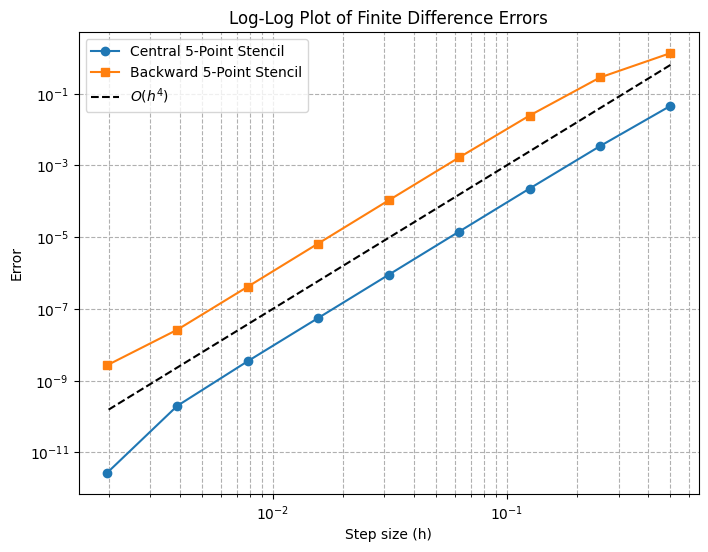

In [6]:
# Define step sizes
hs = [(1/2)**s for s in range(1, 10)]  # Different step sizes

# Store errors for different stencil sizes
errors = np.zeros([2, len(hs)])

for idx, h in enumerate(hs):
    temp, errors[0, idx] = D_2(2, 2, h)  # Central 5-point stencil (2 left, 2 right)
    temp ,errors[1, idx] = D_2(4, 0, h)  # Backward 5-point stencil (4 left, 0 right)

# Plot the results in a log-log plot

plt.figure(figsize=(8, 6))
plt.loglog(hs, errors[0], 'o-', label='Central 5-Point Stencil')
plt.loglog(hs, errors[1], 's-', label='Backward 5-Point Stencil')

# Add an O(h^4) reference line for comparison
ref_slope = [10 * h**4 for h in hs]  # Scaled for visibility
plt.loglog(hs, ref_slope, 'k--', label=r'$O(h^4)$')

# Formatting
plt.xlabel('Step size (h)')
plt.ylabel('Error')
plt.title('Log-Log Plot of Finite Difference Errors')
plt.legend()
plt.grid(True, which="both", linestyle="--")

# Show plot
plt.show()


## part e

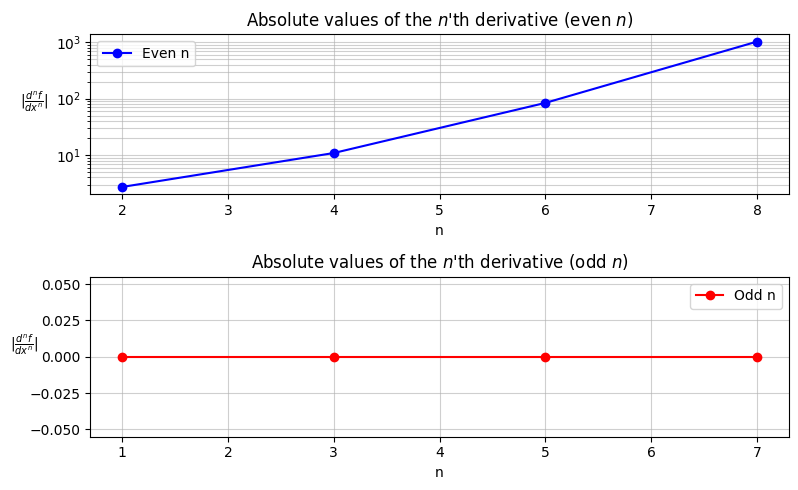

In [37]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = exp(cos(x))
x = sp.symbols('x')
f = sp.exp(sp.cos(x))

# Define g(n) as the nth derivative of f(x)
def g(n):
    return sp.diff(f, x, n)

# Define h(n) as g(n) evaluated at x = 0
def h(n):
    return g(n).subs(x, 0)

# Compute h(n) values for n = 1 to 8
n_values = np.arange(1, 9)
h_values = np.array([h(n).evalf() for n in n_values])

# Split into even and odd n-values
even_n = n_values[n_values % 2 == 0]
odd_n = n_values[n_values % 2 == 1]

even_h = h_values[n_values % 2 == 0]
odd_h = h_values[n_values % 2 == 1]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 5))

# Plot even values
axes[0].semilogy(even_n, np.abs(even_h), 'bo-', label="Even n")
axes[0].set_title("Absolute values of the $n$'th derivative (even $n$)")
axes[0].set_xlabel("n")
axes[0].set_ylabel(r"$|\frac{d^n f}{dx^n}|$", rotation=0, labelpad=5, ha="right")

axes[0].legend()
axes[0].grid(True, which="both", linestyle="-", alpha=0.6)  # Add grid

# Plot odd values
axes[1].plot(odd_n, np.abs(odd_h), 'ro-', label="Odd n")
axes[1].set_title("Absolute values of the $n$'th derivative (odd $n$)")
axes[1].set_xlabel("n")
axes[1].set_ylabel(r"$|\frac{d^n f}{dx^n}|$", rotation=0)
axes[1].legend()
axes[1].grid(True, which="both", linestyle="-", alpha=0.6)  # Add grid

# Show the plot
plt.tight_layout()
plt.show()



## part e

In [57]:
# Define the unknown coefficients
a, b, c, d = sp.symbols('a b c d')

# Define the system of equations
eq1 = sp.Eq(a + b + c + d, 1)
eq2 = sp.Eq(-3/2*a - 1/2*b + 1/2*c + 3/2*d, 0)
eq3 = sp.Eq(9/8*a + 1/8*b + 1/8*c + 9/8*d, 0)
eq4 = sp.Eq(-27/48*a - 1/48*b + 1/48*c + 27/48*d, 0)

# Solve the system symbolically
solution = sp.solve((eq1, eq2, eq3, eq4), (a, b, c, d))
print(solution)

{a: -0.0625000000000000, b: 0.562500000000000, c: 0.562500000000000, d: -0.0625000000000000}


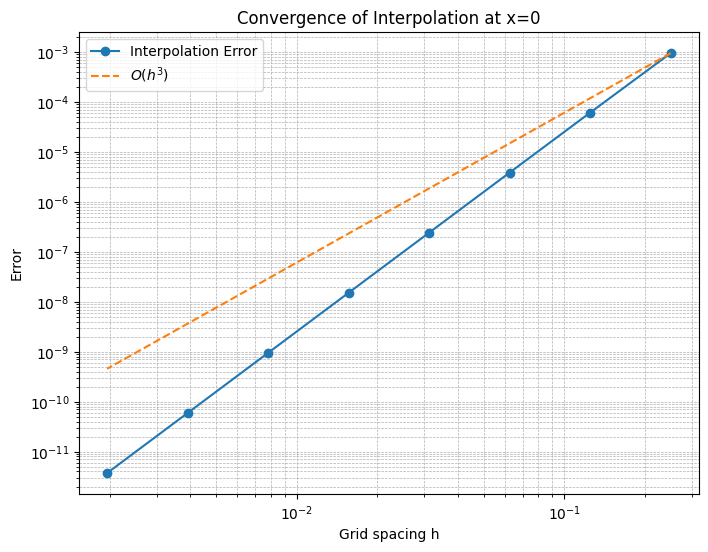

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Interpolation coefficients
coeffs = np.array([-0.0625000000000000, 0.562500000000000, 0.562500000000000, -0.0625000000000000])

# Compute errors for different h values
h_values = [1/2**i for i in range(2, 10)]  # Avoid too large/small values
errors = []

for h in h_values:
    x_vals = np.array([-3*h/2, -h/2, h/2, 3*h/2])
    y_vals = np.exp(np.cos(x_vals))
    error = np.abs(np.exp(np.cos(0)) - np.dot(coeffs, y_vals))  # Absolute error
    errors.append(error)

# Plot error
plt.figure(figsize=(8, 6))
plt.loglog(h_values, errors, 'o-', label="Interpolation Error")

# Add reference O(h^3) line
h_ref = np.array(h_values)
error_ref = errors[0] * (h_ref / h_values[0])**3  # Scale with h^3
plt.loglog(h_ref, error_ref, '--', label=r"$O(h^3)$")

# Formatting
plt.xlabel("Grid spacing h")
plt.ylabel("Error")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.title("Convergence of Interpolation at x=0")

plt.show()
